In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from adjustText import adjust_text
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.ticker as ticker

## 1. Data Cleaning

### 1-1. Raw Data

In [182]:
df_trip = pd.read_csv('../data/trippub.csv', error_bad_lines=False)
df_hh = pd.read_csv('../data/hhpub.csv', error_bad_lines=False)
df_per = pd.read_csv('../data/perpub.csv', error_bad_lines=False)
df_veh = pd.read_csv('../data/vehpub.csv', error_bad_lines=False)

### 1-2. Extract features that are the causes of the travel mode choice

Features that are the results of the travel mode choice are excluded.  
e.g. trip duration, driver flag

https://nhts.ornl.gov/tables09/CodebookBrowser.aspx

In [3]:
col_trip_all = [
    'DBHTNRNT', \
    'DBHUR', \
    'DBPPOPDN', \
    'DBRESDN', \
    'DTEEMPDN', \
    'DTHTNRNT', \
    'DTPPOPDN', \
    'DTRESDN', \
    'EDUC', \
    'GASPRICE', \
    'HHFAMINC', \
    'HHSIZE', \
    'HHSTATE', \
    'HHVEHCNT', \
    'HH_HISP', \
    'HH_ONTD', \
    'HH_RACE', \
    'HOMEOWN', \
    'HOUSEID', \
    'LIF_CYC', \
    'LOOP_TRIP', \
    'NONHHCNT', \
    'NUMADLT', \
    'NUMONTRP', \
    'OBHTNRNT', \
    'OBHUR', \
    'OBPPOPDN', \
    'OBRESDN', \
    'OTEEMPDN', \
    'OTHTNRNT', \
    'OTPPOPDN', \
    'OTRESDN', \
    'PERSONID', \
    'PRMACT', \
    'R_AGE', \
    'R_AGE_IMP', \
    'R_SEX', \
    'R_SEX_IMP', \
    'STRTTIME', \
    'TDAYDATE', \
    'TDWKND', \
    'TRAVDAY', \
    'TRIPPURP', \
    'TRPACCMP', \
    'TRPHHACC', \
    'TRPTRANS', \
    'URBAN', \
    'URBANSIZE', \
    'URBRUR', \
    'WHYTRP1S', \
    'WORKER', \
    'WRKCOUNT', \
    'WTTRDFIN'
]

In [4]:
col_veh_all = [
    'ANNMILES', \
    'BESTMILE', \
    'BEST_EDT', \
    'BEST_FLG', \
    'BEST_OUT', \
    'FEGEMPG', \
    'FEGEMPGA', \
    'FEGEMPGF', \
    'FUELTYPE', \
    'GSCOST', \
    'GSTOTCST', \
    'GSYRGAL', \
    'HBHTNRNT', \
    'HBHUR', \
    'HBPPOPDN', \
    'HBRESDN', \
    'HFUEL', \
    'HHFAMINC', \
    'HHSIZE', \
    'HHVEHCNT', \
    'HH_HISP', \
    'HH_RACE', \
    'HOMEOWN', \
    'HOUSEID', \
    'HTEEMPDN', \
    'HTHTNRNT', \
    'HTPPOPDN', \
    'HTRESDN', \
    'HYBRID', \
    'LIF_CYC', \
    'MAKE', \
    'MODEL', \
    'NUMADLT', \
    'OD_READ', \
    'PERSONID', \
    'TDAYDATE', \
    'TRAVDAY', \
    'URBAN', \
    'URBANSIZE', \
    'URBRUR', \
    'VEHAGE', \
    'VEHOWNED', \
    'VEHOWNMO', \
    'VEHYEAR', \
    'WHOMAIN', \
    'WRKCOUNT', \
    'WTHHFIN'
]

In [5]:
col_per_all = [
    'ALT_16', \
    'ALT_23', \
    'ALT_45', \
    'BIKE4EX', \
    'BIKESHARE', \
    'BIKE_DFR', \
    'BIKE_GKP', \
    'BORNINUS', \
    'CARRODE', \
    'CARSHARE', \
    'CONDNIGH', \
    'CONDPUB', \
    'CONDRIDE', \
    'CONDRIVE', \
    'CONDSPEC', \
    'CONDTAX', \
    'CONDTRAV', \
    'DELIVER', \
    'DISTTOSC17', \
    'DISTTOWK17', \
    'EDUC', \
    'FLEXTIME', \
    'FRSTHM17', \
    'GCDWORK', \
    'GT1JBLWK', \
    'HBHTNRNT', \
    'HBHUR', \
    'HBPPOPDN', \
    'HBRESDN', \
    'HEALTH', \
    'HHFAMINC', \
    'HHSIZE', \
    'HHVEHCNT', \
    'HH_HISP', \
    'HH_RACE', \
    'HOMEOWN', \
    'HOUSEID', \
    'HTEEMPDN', \
    'HTHTNRNT', \
    'HTPPOPDN', \
    'HTRESDN', \
    'LIF_CYC', \
    'LPACT', \
    'LSTTRDAY17', \
    'MCUSED', \
    'MEDCOND', \
    'MEDCOND6', \
    'NBIKETRP', \
    'NOCONG', \
    'NUMADLT', \
    'NWALKTRP', \
    'OCCAT', \
    'OUTCNTRY', \
    'OUTOFTWN', \
    'PAYPROF', \
    'PERSONID', \
    'PHYACT', \
    'PRMACT', \
    'PTUSED', \
    'PUBTIME', \
    'RIDESHARE', \
    'R_AGE', \
    'R_AGE_IMP', \
    'R_HISP', \
    'R_RACE', \
    'R_RELAT', \
    'R_SEX', \
    'R_SEX_IMP', \
    'SAMEPLC', \
    'SCHTYP', \
    'TDAYDATE', \
    'TIMETOWK', \
    'TRAVDAY', \
    'URBAN', \
    'URBANSIZE', \
    'URBRUR', \
    'VPACT', \
    'WALK4EX', \
    'WALK_DEF', \
    'WALK_GKQ', \
    'WKFMHMXX', \
    'WKFTPT', \
    'WKRMHM', \
    'WORKER', \
    'WRKCOUNT', \
    'WRK_HOME', \
    'WTPERFIN', \
    'W_CANE', \
    'W_CHAIR', \
    'W_CRUTCH', \
    'W_DOG', \
    'W_MTRCHR', \
    'W_NONE', \
    'W_SCOOTR', \
    'W_WHCANE', \
    'W_WLKR', \
    'YEARMILE', \
    'YRTOUS'
]

In [6]:
col_hh_all = [
    'BIKE', \
    'BIKE2SAVE', \
    'BUS', \
    'CAR', \
    'HBHTNRNT', \
    'HBHUR', \
    'HBPPOPDN', \
    'HBRESDN', \
    'HHFAMINC', \
    'HHRELATD', \
    'HHSIZE', \
    'HHVEHCNT', \
    'HH_HISP', \
    'HH_RACE', \
    'HOMEOWN', \
    'HOUSEID', \
    'HTEEMPDN', \
    'HTHTNRNT', \
    'HTPPOPDN', \
    'HTRESDN', \
    'LIF_CYC', \
    'NUMADLT', \
    'PARA', \
    'PC', \
    'PLACE', \
    'PRICE', \
    'PTRANS', \
    'SPHONE', \
    'TAB', \
    'TAXI', \
    'TDAYDATE', \
    'TRAIN', \
    'TRAVDAY', \
    'URBAN', \
    'URBANSIZE', \
    'URBRUR', \
    'WALK', \
    'WALK2SAVE', \
    'WEBUSE17', \
    'WRKCOUNT', \
    'WTHHFIN', \
    'YOUNGCHILD'
]

### 1-3. Remove duplicate features

In [7]:
col_trip = col_trip_all # trip
col_hh = [i for i in col_hh_all if i not in col_trip] # household - trip
col_per = [i for i in col_per_all if i not in col_trip + col_hh] # person - trip - household
col_veh = [i for i in col_veh_all if i not in col_trip + col_hh + col_per] # vehicle - trip - household - person

In [8]:
# append id for join
col_hh.append('HOUSEID')
col_per.extend(['HOUSEID', 'PERSONID'])

In [9]:
print(len(col_trip), len(col_hh), len(col_per), len(col_veh))

53 28 69 22


In [10]:
df_trip_stg = df_trip[col_trip]
df_hh_stg = df_hh[col_hh]
df_per_stg = df_per[col_per]
df_veh_stg = df_veh[col_veh]

In [11]:
df_trip_hh = pd.merge(df_trip_stg, df_hh_stg, how='left', left_on='HOUSEID', right_on='HOUSEID')

In [12]:
df_merge_stg = pd.merge(df_trip_hh, df_per_stg, how='left', left_on=['HOUSEID', 'PERSONID'], right_on=['HOUSEID', 'PERSONID'])

In [13]:
df_merge_stg.head()

DBHTNRNT DBHUR  DBPPOPDN  DBRESDN  DTEEMPDN  DTHTNRNT  DTPPOPDN  DTRESDN  \
0        30     T       300      300       350        50       750      300   
1        20     T       750      300       750        50      1500      750   
2        20     T       750      300       750        50      1500      750   
3        40     S      1500      750       750        40      1500      750   
4        60     T       750      300       350        50       750      300   

   EDUC  GASPRICE  ...  W_CHAIR  W_CRUTCH W_DOG  W_MTRCHR  W_NONE  W_SCOOTR  \
0     3     228.4  ...       -1        -1    -1        -1      -1        -1   
1     3     228.4  ...       -1        -1    -1        -1      -1        -1   
2     3     228.4  ...       -1        -1    -1        -1      -1        -1   
3     3     228.4  ...       -1        -1    -1        -1      -1        -1   
4     2     228.4  ...       -1        -1    -1        -1      -1        -1   

   W_WHCANE  W_WLKR  YEARMILE  YRTOUS  
0        -1      -1      1000      -1  
1        -1      -1      1000      -1  
2        -1      -1     10000      -1  
3        -1      -1     10000      -1  
4        -1      -1      1000      -1  

[5 rows x 147 columns]

In [14]:
print(len(df_trip), len(df_trip_hh))

923572 923572


In [15]:
print(len(df_merge_stg))

923572


### 1-4. Group Target

In [16]:
def tripmode(x):
    if x in (1, 2, 11, 15, 16): # walk, bike, public transit
        return 1
    else:
        return 0
    
'''
def tripmode(x):
    if x in (1, 2):
        return 0 # soft mode (walk or bicycle)
    elif x in (3, 4, 5, 6, 7, 8, 9, 18):
        return 1 # car
    elif x in (11, 15, 16):
        return 2 # public transit
    else:
        return 3 # other
'''

'\ndef tripmode(x):\n    if x in (1, 2):\n        return 0 # soft mode (walk or bicycle)\n    elif x in (3, 4, 5, 6, 7, 8, 9, 18):\n        return 1 # car\n    elif x in (11, 15, 16):\n        return 2 # public transit\n    else:\n        return 3 # other\n'

In [17]:
df_merge_stg['TARGET'] = df_merge_stg['TRPTRANS'].apply(tripmode)
df_merge = df_merge_stg.drop(['TRPTRANS'], axis=1)

In [18]:
df_merge['TARGET'].value_counts()

0    823160
1    100412
Name: TARGET, dtype: int64

### 1-5 Convert to float

In [19]:
col_cat = []
for col in df_merge.columns:
    try:
        _ = df_merge[col].astype(float)
    except ValueError:
        print('Couldn\'t covert %s to float' % col)
        col_cat.append(col)
        pass

Couldn't covert DBHUR to float
Couldn't covert HHSTATE to float
Couldn't covert OBHUR to float
Couldn't covert TRIPPURP to float
Couldn't covert HBHUR to float


# State Level Analysis

## 2. Anomaly Detection

### 2-1. Select features

In [20]:
# correlation with the target
cor = df_merge.drop(col_cat + ['TARGET'], axis=1).apply(lambda x: x.corr(df_merge['TARGET']))

In [21]:
df_cor = pd.DataFrame(cor).rename(columns={0: 'correlation'}).dropna()

<AxesSubplot:>

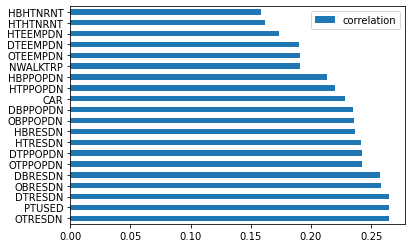

In [23]:
# top positive correlation
df_cor.sort_values(by='correlation', ascending=False).iloc[:20].plot.barh()

<AxesSubplot:>

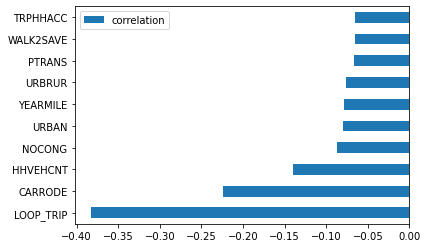

In [22]:
# top negative correlation
df_cor.sort_values(by='correlation').iloc[:10].plot.barh()

In [24]:
# cut off line: equal to or more than 0.15 + equal to or less than -0.15
df_cor[df_cor['correlation'].apply(lambda x: np.abs(x)) >= 0.15].sort_index()

correlation
CAR           0.228295
CARRODE      -0.224285
DBPPOPDN      0.235296
DBRESDN       0.257412
DTEEMPDN      0.190098
DTPPOPDN      0.242119
DTRESDN       0.264636
HBHTNRNT      0.158765
HBPPOPDN      0.213196
HBRESDN       0.236922
HTEEMPDN      0.173204
HTHTNRNT      0.161628
HTPPOPDN      0.219936
HTRESDN       0.241465
LOOP_TRIP    -0.383328
NWALKTRP      0.190872
OBPPOPDN      0.235478
OBRESDN       0.258023
OTEEMPDN      0.190750
OTPPOPDN      0.242698
OTRESDN       0.264952
PTUSED        0.264715

In [25]:
clus_col = df_cor[df_cor['correlation'].apply(lambda x: np.abs(x)) >= 0.15].index

In [26]:
clus_col = sorted(list(clus_col))

In [27]:
df_cluster = df_merge[['HHSTATE'] + clus_col]

In [28]:
# selected features with state
df_cluster.head()

HHSTATE  CAR  CARRODE  DBPPOPDN  DBRESDN  DTEEMPDN  DTPPOPDN  DTRESDN  \
0      NC    1       -1       300      300       350       750      300   
1      NC    1       -1       750      300       750      1500      750   
2      NC    1        1       750      300       750      1500      750   
3      NC    1        1      1500      750       750      1500      750   
4      NC    1       -1       750      300       350       750      300   

   HBHTNRNT  HBPPOPDN  ...  HTPPOPDN  HTRESDN  LOOP_TRIP  NWALKTRP  OBPPOPDN  \
0        20       750  ...      1500      750          2         3       750   
1        20       750  ...      1500      750          2         3       300   
2        20       750  ...      1500      750          2         7      1500   
3        20       750  ...      1500      750          2         7       750   
4        20       750  ...      1500      750          2         7       750   

   OBRESDN  OTEEMPDN  OTPPOPDN  OTRESDN  PTUSED  
0      300       750      1500      750       0  
1      300       350       750      300       0  
2      750       750      1500      750       0  
3      300       750      1500      750       0  
4      300       750      1500      750       0  

[5 rows x 23 columns]

### 2-2. Aggregate to the state level

In [29]:
# use mean for aggregate function
df_mean = df_cluster.groupby(['HHSTATE']).mean()

In [30]:
sc = StandardScaler()

In [31]:
# standardization
df_mean_norm = pd.DataFrame(sc.fit_transform(df_mean), columns=df_mean.columns, index=list(df_mean.index))
df_mean_norm.head()

CAR   CARRODE  DBPPOPDN   DBRESDN  DTEEMPDN  DTPPOPDN   DTRESDN  \
AK -0.009791  0.025142 -0.209137 -0.276367 -0.279128 -0.327686 -0.358845   
AL -0.536848  0.522411 -0.951223 -0.770288 -1.150352 -0.882970 -0.715211   
AR -0.217000  0.523371 -0.893103 -0.707671 -1.126955 -0.896871 -0.731550   
AZ  0.303447 -0.143268 -0.298222 -0.330686 -0.449293 -0.331904 -0.342278   
CA  0.339361 -0.279503  1.096415  0.622725  1.252445  1.037792  0.627795   

    HBHTNRNT  HBPPOPDN   HBRESDN  ...  HTPPOPDN   HTRESDN  LOOP_TRIP  \
AK  1.703676  0.032766 -0.112637  ... -0.209614 -0.292088   0.678065   
AL -0.789356 -0.869199 -0.639876  ... -0.800364 -0.613749   1.830130   
AR  0.034412 -0.798041 -0.609697  ... -0.813251 -0.607066   1.954688   
AZ -0.507230 -0.341644 -0.329113  ... -0.342554 -0.320662  -1.406034   
CA  1.726867  1.004416  0.545816  ...  0.961808  0.549539  -0.513327   

    NWALKTRP  OBPPOPDN   OBRESDN  OTEEMPDN  OTPPOPDN   OTRESDN    PTUSED  
AK -0.112165 -0.215560 -0.278617 -0.283949 -0.326351 -0.351489 -0.161784  
AL  0.201190 -0.956399 -0.774922 -1.151872 -0.886240 -0.716968 -0.505595  
AR -0.724425 -0.890136 -0.705172 -1.121291 -0.891662 -0.727367 -0.632220  
AZ -0.427336 -0.297614 -0.329179 -0.448454 -0.329628 -0.341436 -0.458811  
CA  0.063486  1.101331  0.627509  1.255800  1.043179  0.629141  0.043690  

[5 rows x 22 columns]

### 2-3. Anomaly detection with DBSCAN

In [75]:
eps = 5 
min_samples = 3

In [76]:
db = DBSCAN(eps, min_samples).fit(df_mean_norm)
db_label = db.labels_

/Users/dn/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass min_samples=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [77]:
# number of clusters
len(np.unique(db_label[db_label >= 0]))

1

In [78]:
# number of unassigned states
len(db_label[db_label < 0])

1

### 2-4. PCA for visualization

In [222]:
pca = PCA()
pca.fit(df_mean_norm)

PCA()

In [223]:
pca.explained_variance_ratio_

array([8.59932444e-01, 5.16652347e-02, 4.15534395e-02, 3.02013173e-02,
       4.99329628e-03, 4.74219628e-03, 3.11777194e-03, 1.22515049e-03,
       1.04815377e-03, 6.47415355e-04, 3.99152326e-04, 2.63287933e-04,
       1.07356345e-04, 4.47295021e-05, 3.70221157e-05, 1.43179106e-05,
       5.42898137e-06, 1.66645861e-06, 3.31740815e-07, 2.04736194e-07,
       5.17367630e-08, 3.08628775e-08])

In [34]:
df_pca = pd.DataFrame(pca.transform(df_mean_norm)[:,:2], index=df_mean_norm.index) # take the first two principal components

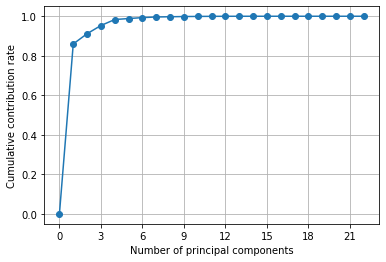

In [225]:
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

### 2-5. Visualization

255

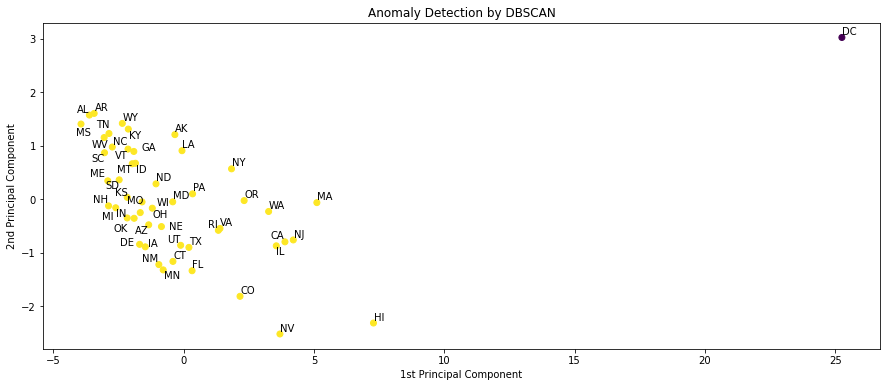

In [82]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = plt.scatter(df_pca[0], df_pca[1], c=db_label)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Anomaly Detection by DBSCAN')
texts = [plt.text(df_pca[0][i], df_pca[1][i], list(df_pca.index)[i], ha='center', va='center') for i in range(len(df_pca))]
adjust_text(texts)

106

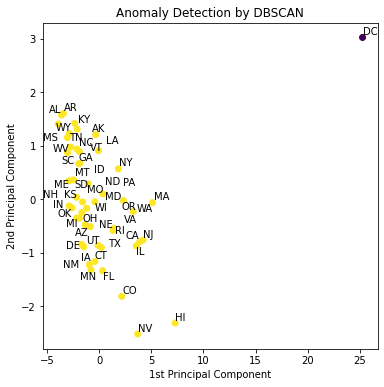

In [227]:
# for slide
fig, ax = plt.subplots(figsize=(6, 6))
ax = plt.scatter(df_pca[0], df_pca[1], c=db_label)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Anomaly Detection by DBSCAN')
texts = [plt.text(df_pca[0][i], df_pca[1][i], list(df_pca.index)[i], ha='center', va='center') for i in range(len(df_pca))]
adjust_text(texts)

DC looks anomalous. We exclude DC for clustering.

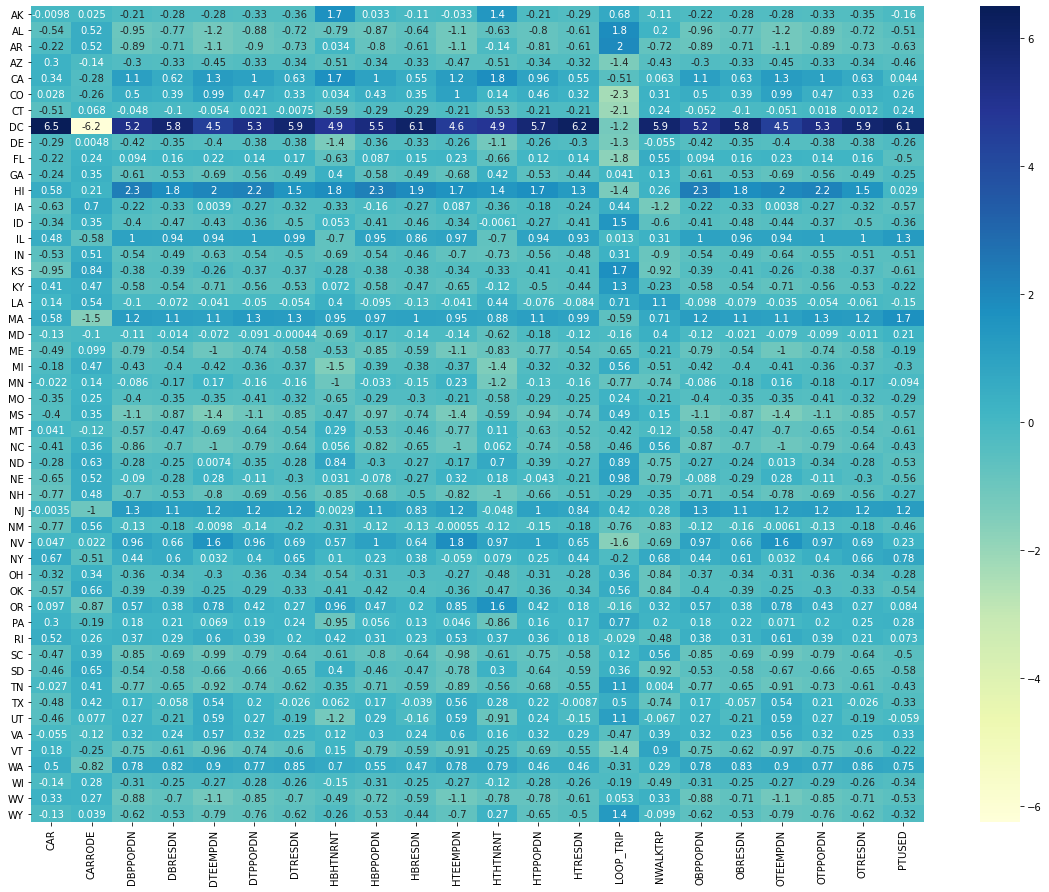

In [229]:
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(df_mean_norm, cmap='YlGnBu', annot=True)

## 3. Clustering

### 3-1. Exclude the anomalous state

In [231]:
df_mean_normal = df_mean_norm.drop(index=['DC'])

### 3-2. Calculate soft mode and public transit ratio

In [232]:
df_ratio = df_merge.groupby(['HHSTATE']).agg({'HHSTATE': 'count', 'TARGET': 'sum'}).rename(columns={'HHSTATE': 'total', 'TARGET': 'eco'})
df_ratio['ratio'] = df_ratio['eco'] / df_ratio['total']

In [233]:
df_ratio.head()

total    eco     ratio
HHSTATE                         
AK         1776    213  0.119932
AL         2150     91  0.042326
AR         1288     69  0.053571
AZ        19696   2043  0.103727
CA       185666  27268  0.146866

In [234]:
# exclude DC
df_ratio_normal = df_ratio.drop(index=['DC'])

### 3-3. Clustering by KMeans with silhouette score

In [235]:
# the number of clusters to test
range_n_clusters = list(range(2, 16))

In [236]:
# try different number of clusters
best_n = 0
best_score = 0
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(df_mean_normal)
    #report average Silhouette score
    silhouette_avg = silhouette_score(df_mean_normal, cluster_labels)
    if silhouette_avg > best_score:
        best_n = n_clusters
        best_score = silhouette_avg
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.48136407940417925
For n_clusters =3, the average silhouette_score is :0.2622048628879624
For n_clusters =4, the average silhouette_score is :0.25125717589975094
For n_clusters =5, the average silhouette_score is :0.2398392005380544
For n_clusters =6, the average silhouette_score is :0.19994579036805846
For n_clusters =7, the average silhouette_score is :0.22055354637131852
For n_clusters =8, the average silhouette_score is :0.20586186508725085
For n_clusters =9, the average silhouette_score is :0.21520459021223534
For n_clusters =10, the average silhouette_score is :0.20770031431873448
For n_clusters =11, the average silhouette_score is :0.22884679056372786
For n_clusters =12, the average silhouette_score is :0.2054268103974449
For n_clusters =13, the average silhouette_score is :0.1892955766765453
For n_clusters =14, the average silhouette_score is :0.1927032106845773
For n_clusters =15, the average silhouette_score is :0.178690032

2 is the best number of clusters.

In [237]:
# clustering with the best number of clusters
KM = KMeans(n_clusters=best_n, random_state=324)
cluster_km = KM.fit_predict(df_mean_normal)
cluster_km

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0], dtype=int32)

### 3-4. PCA for visualization excluding DC

In [238]:
pca = PCA()
pca.fit(df_mean_normal)

PCA()

In [239]:
pca.explained_variance_ratio_

array([7.31712784e-01, 1.03709685e-01, 7.51516787e-02, 5.20876483e-02,
       1.20059579e-02, 1.09300147e-02, 6.75079028e-03, 2.94813282e-03,
       1.61165219e-03, 1.16381392e-03, 9.36983047e-04, 5.72179628e-04,
       1.84233473e-04, 1.03788570e-04, 8.23982492e-05, 3.04439157e-05,
       1.29089228e-05, 3.60255033e-06, 6.43641936e-07, 4.62171858e-07,
       1.24566578e-07, 7.36926636e-08])

In [240]:
df_pca_normal = pd.DataFrame(pca.transform(df_mean_normal)[:,:2], index=df_mean_normal.index) # take the first two principal components

https://qiita.com/maskot1977/items/082557fcda78c4cdb41f

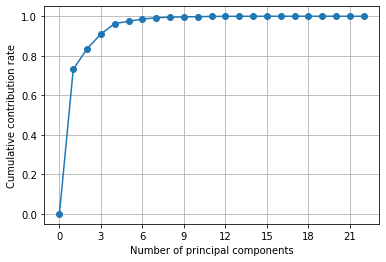

In [241]:
# cumulative contribution ratio
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [242]:
# decomposition
pd.DataFrame(pca.components_, columns=df_mean_normal.columns, index=["PC{}".format(x + 1) for x in range(len(df_mean_normal.columns))]).head()

CAR   CARRODE  DBPPOPDN   DBRESDN  DTEEMPDN  DTPPOPDN   DTRESDN  \
PC1  0.087889 -0.116203  0.262537  0.215106  0.291290  0.255899  0.211997   
PC2  0.012241 -0.106225 -0.025122  0.015033 -0.032865 -0.005260  0.028295   
PC3 -0.106687  0.062363  0.065261  0.042070  0.107729  0.080070  0.063919   
PC4  0.289393 -0.373920 -0.014412  0.087955 -0.211123  0.004163  0.120421   
PC5 -0.027836  0.602920  0.078949  0.049405 -0.035920  0.105730  0.000144   

     HBHTNRNT  HBPPOPDN   HBRESDN  ...  HTPPOPDN   HTRESDN  LOOP_TRIP  \
PC1  0.148731  0.241051  0.194233  ...  0.226434  0.179025  -0.164178   
PC2 -0.391459 -0.047701 -0.005936  ... -0.015682  0.014299  -0.791662   
PC3 -0.573854  0.057779  0.033678  ...  0.081951  0.061950   0.488341   
PC4 -0.017812 -0.053175  0.046694  ... -0.017608  0.073427   0.305185   
PC5  0.003340  0.134901  0.137538  ...  0.047335  0.030270   0.053514   

     NWALKTRP  OBPPOPDN   OBRESDN  OTEEMPDN  OTPPOPDN   OTRESDN    PTUSED  
PC1  0.054662  0.263312  0.216348  0.291334  0.256077  0.212177  0.145063  
PC2  0.173436 -0.025831  0.014112 -0.033222 -0.006449  0.027028  0.081718  
PC3 -0.210872  0.065548  0.042514  0.108455  0.080553  0.064312  0.093051  
PC4  0.588769 -0.014435  0.089403 -0.211541  0.003888  0.120051  0.377235  
PC5  0.563790  0.078783  0.049761 -0.037501  0.100398 -0.004006 -0.450782  

[5 rows x 22 columns]

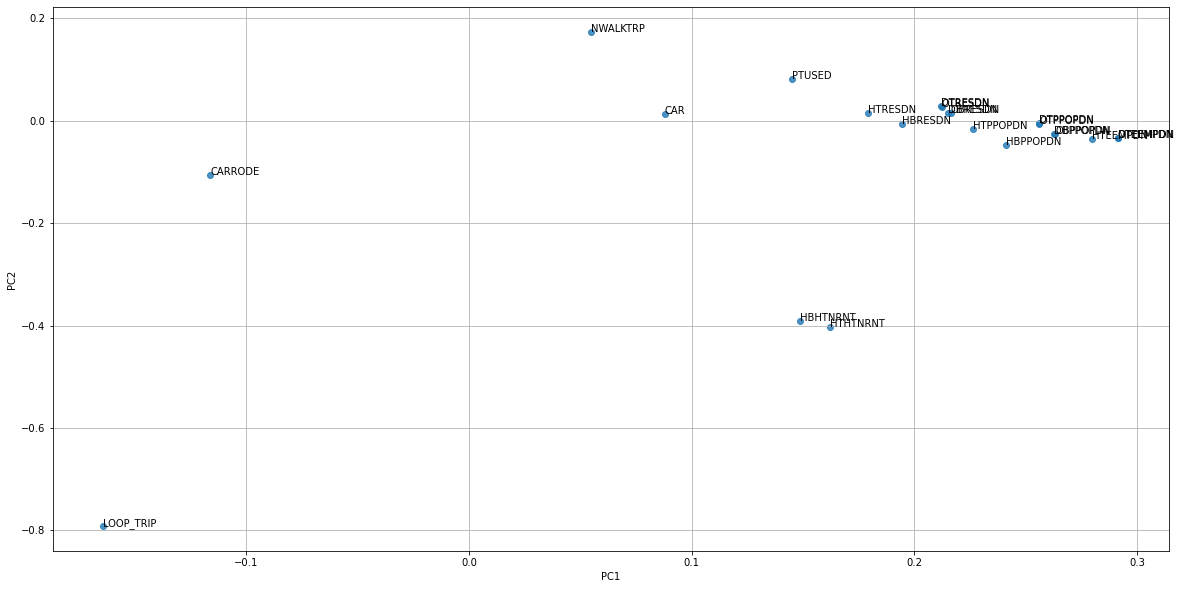

In [243]:
# relation between the principal components and features
plt.figure(figsize=(20, 10))
for x, y, name in zip(pca.components_[0], pca.components_[1], df_mean_normal.columns):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### 3-5. Visualization

6

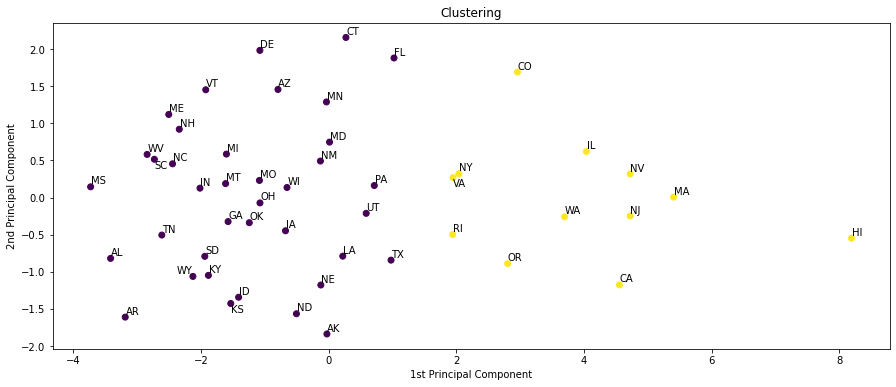

In [244]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = plt.scatter(df_pca_normal[0], df_pca_normal[1], c=cluster_km)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Clustering')
texts = [plt.text(df_pca_normal[0][i], df_pca_normal[1][i], list(df_pca_normal.index)[i], ha='center', va='center') for i in range(len(df_pca_normal))]
adjust_text(texts)

6

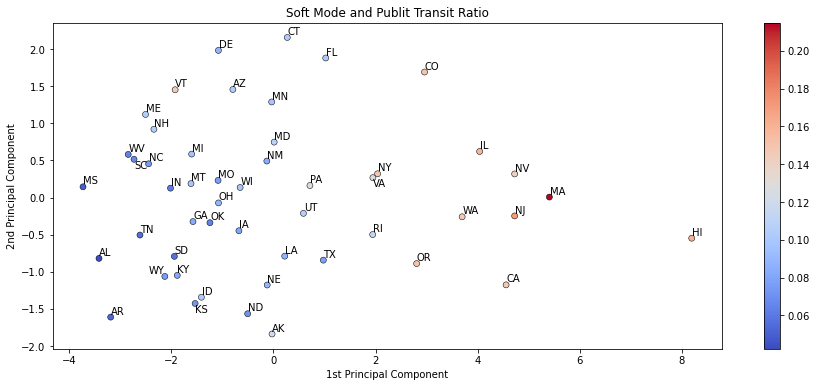

In [245]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = plt.scatter(df_pca_normal[0], df_pca_normal[1], c=df_ratio_normal['ratio'], cmap='coolwarm', edgecolors='black', linewidths=.5)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Soft Mode and Publit Transit Ratio')
plt.colorbar()
texts = [plt.text(df_pca_normal[0][i], df_pca_normal[1][i], list(df_pca_normal.index)[i], ha='center', va='center') for i in range(len(df_pca_normal))]
adjust_text(texts)

The result of clustering and the ratio of soft mode and public transit are closely related.

7

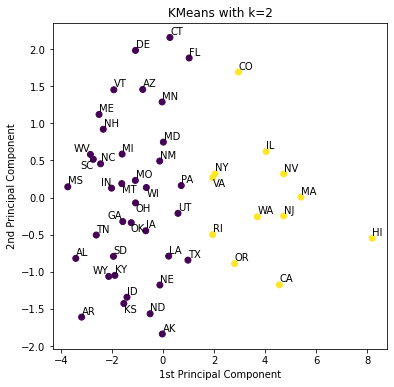

In [246]:
# for slide
fig, ax = plt.subplots(figsize=(6, 6))
ax = plt.scatter(df_pca_normal[0], df_pca_normal[1], c=cluster_km)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('KMeans with k=2')
texts = [plt.text(df_pca_normal[0][i], df_pca_normal[1][i], list(df_pca_normal.index)[i], ha='center', va='center') for i in range(len(df_pca_normal))]
adjust_text(texts)

7

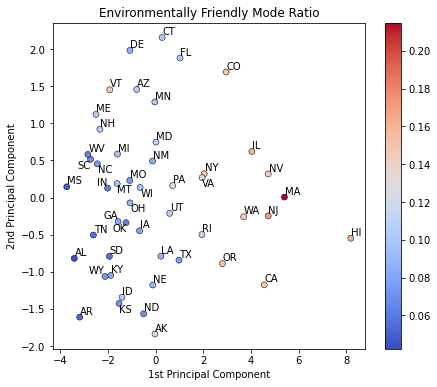

In [248]:
# for slide
fig, ax = plt.subplots(figsize=(7, 6))
ax = plt.scatter(df_pca_normal[0], df_pca_normal[1], c=df_ratio_normal['ratio'], cmap='coolwarm', edgecolors='black', linewidths=.5)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Environmentally Friendly Mode Ratio')
plt.colorbar()
texts = [plt.text(df_pca_normal[0][i], df_pca_normal[1][i], list(df_pca_normal.index)[i], ha='center', va='center') for i in range(len(df_pca_normal))]
adjust_text(texts)

## 4. Feature Understanding

### 4-1. Normalized features by state

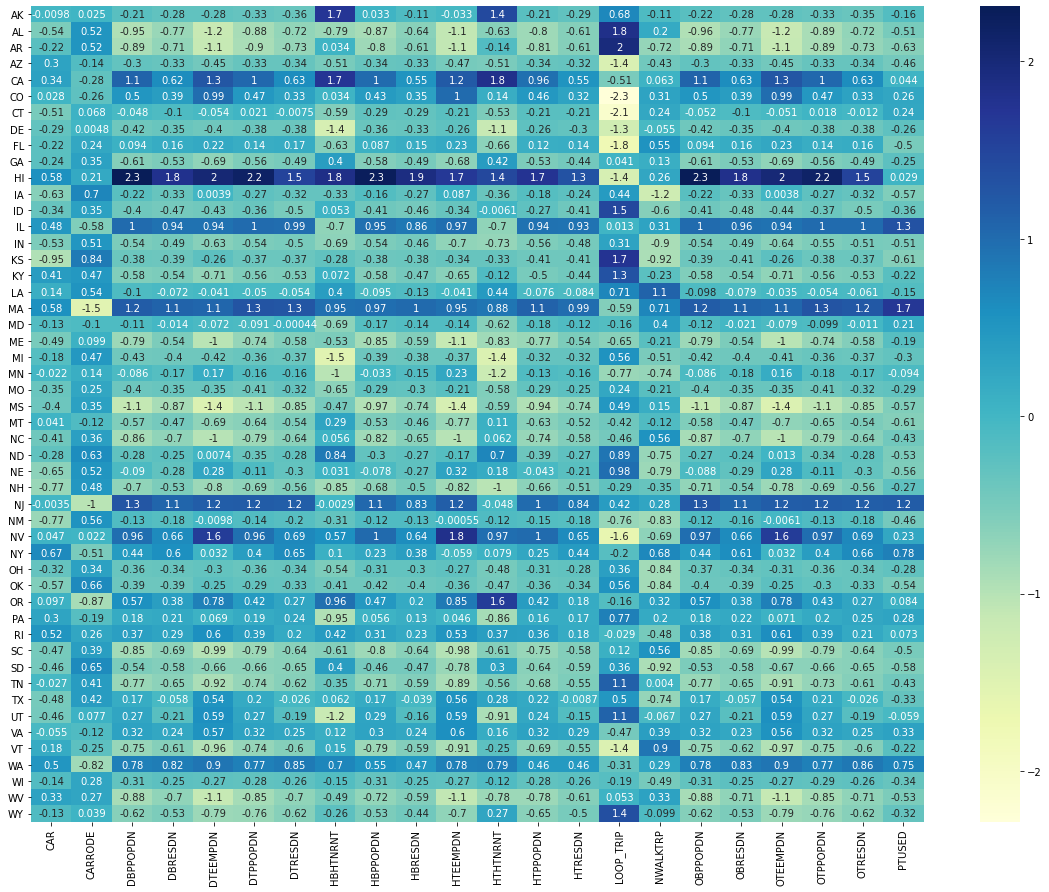

In [119]:
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(df_mean_normal, cmap='YlGnBu', annot=True)

### 4-2. Correlation among features

In [120]:
df_mean_cluster = df_mean_normal.copy()
df_mean_cluster['label'] = cluster_km

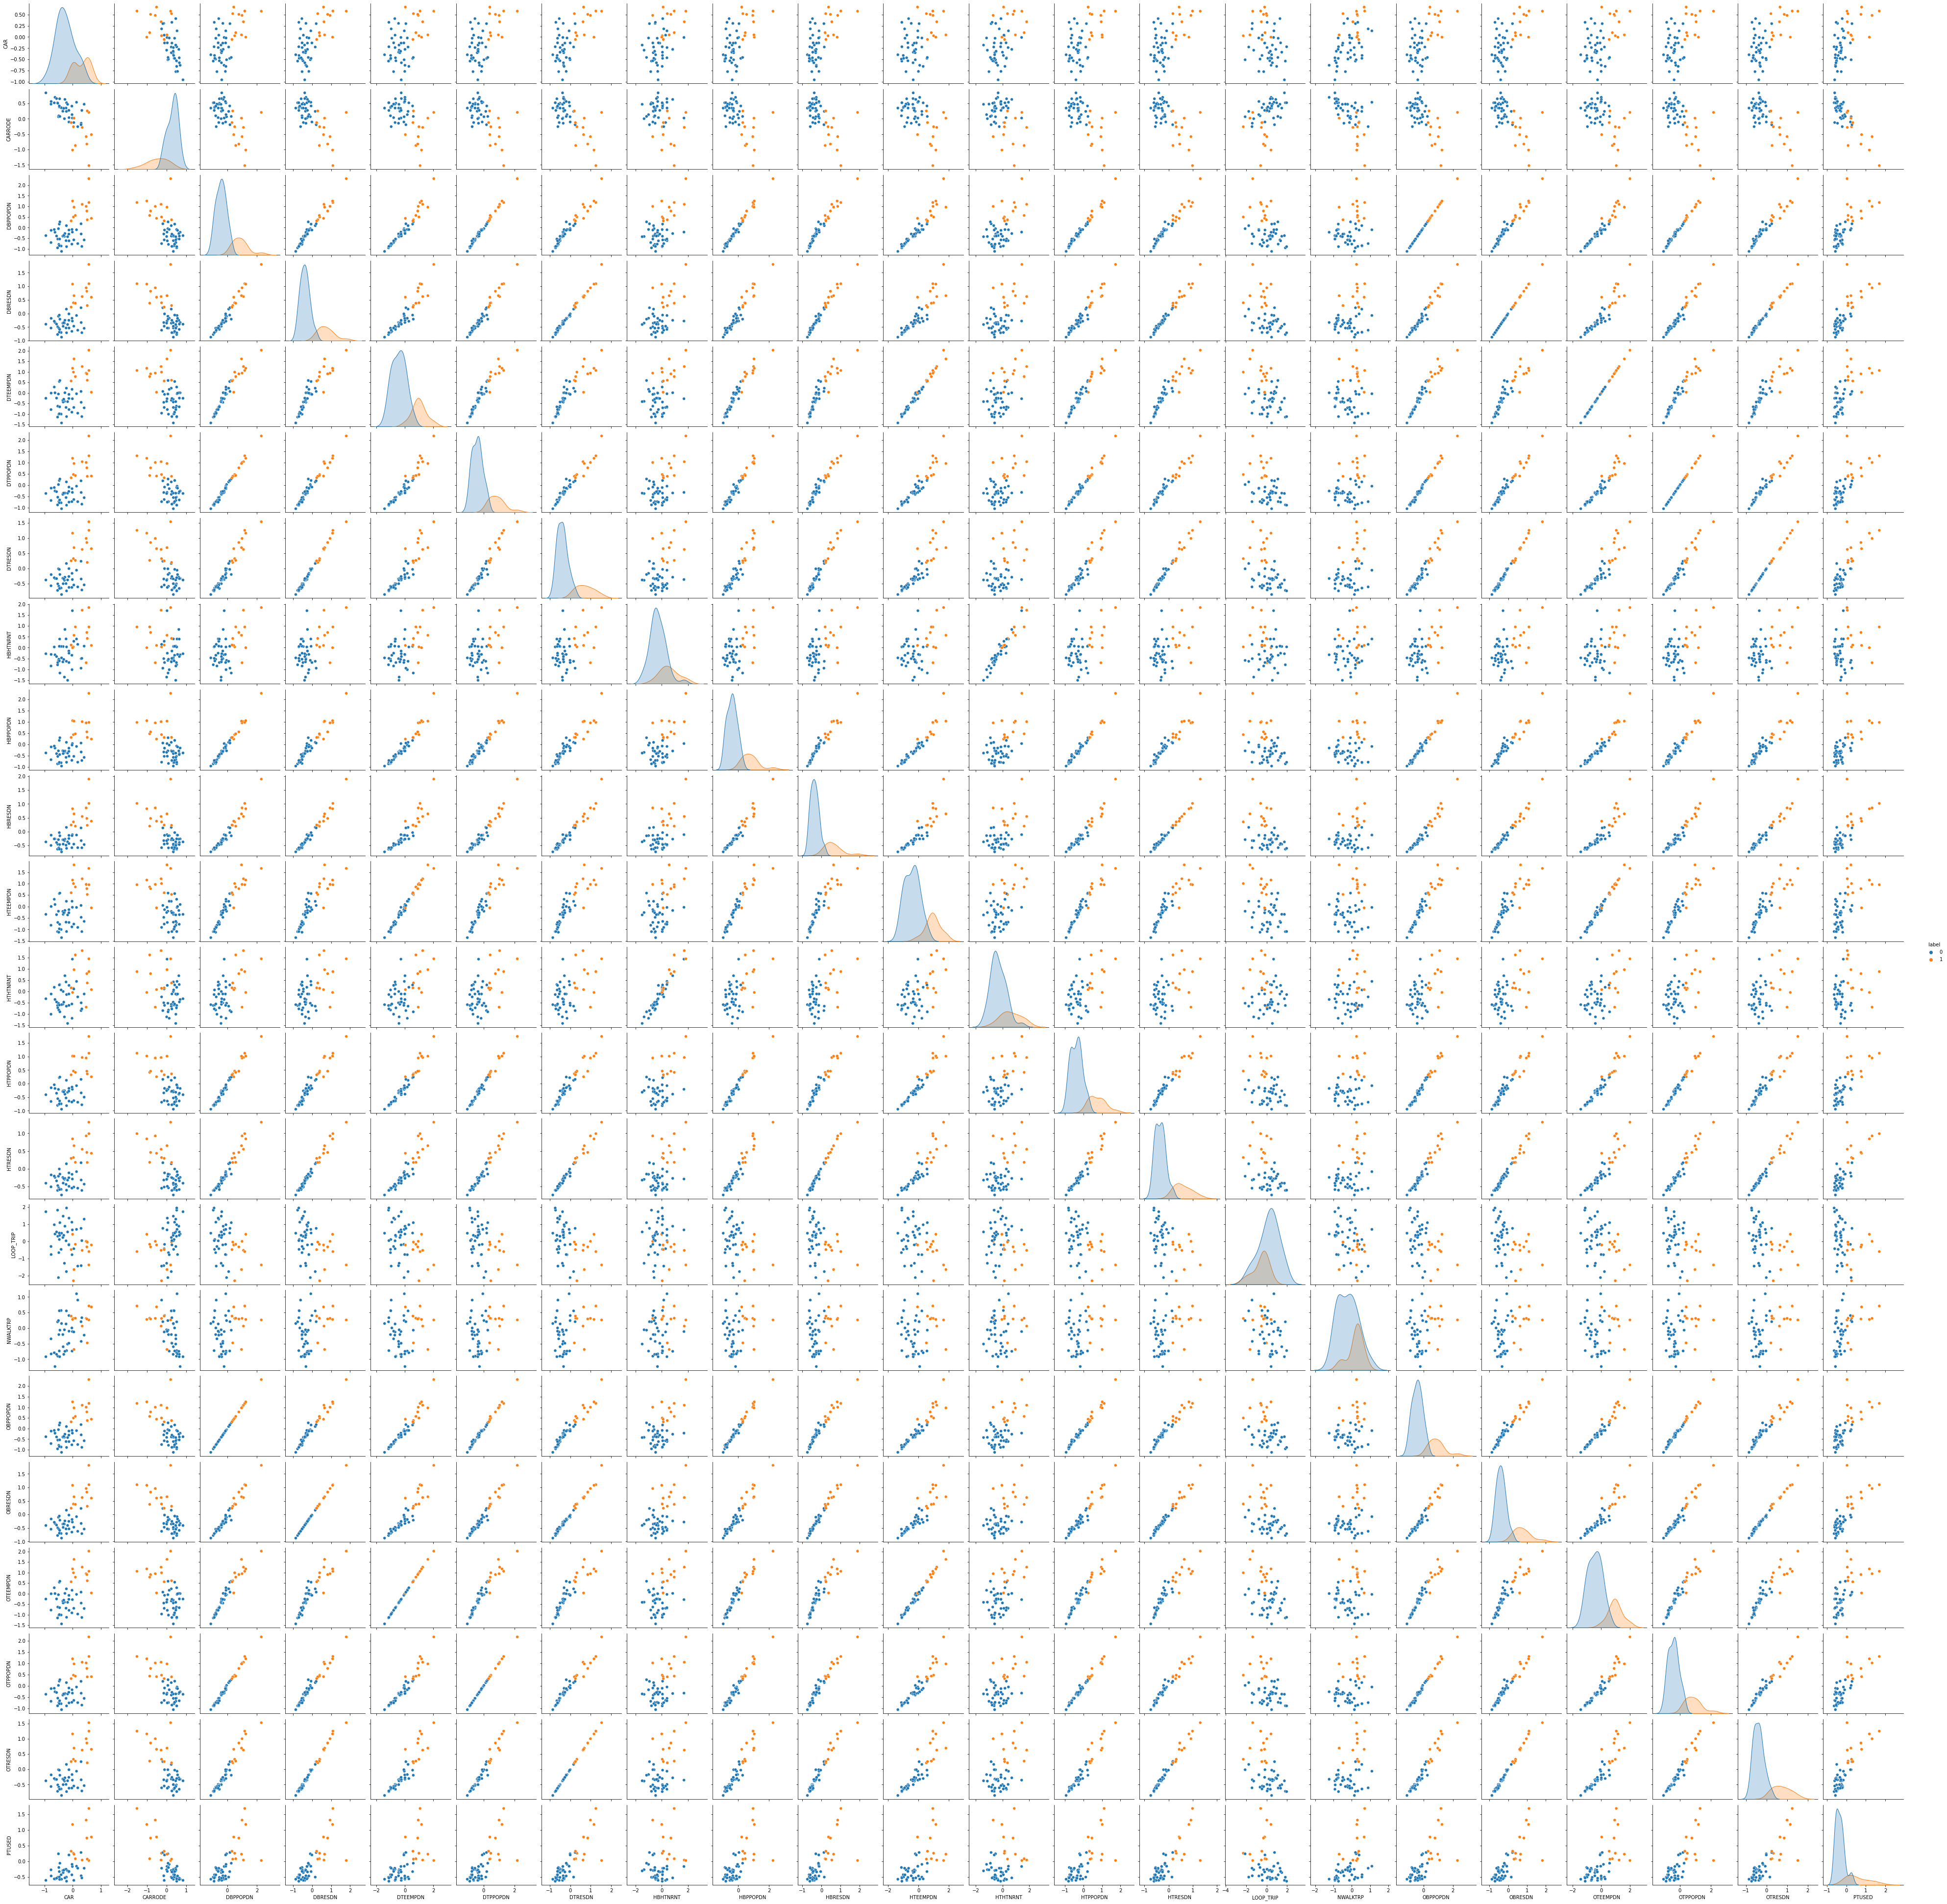

In [121]:
sns.pairplot(df_mean_cluster, hue='label')

In [122]:
corr = df_mean_cluster.corr()

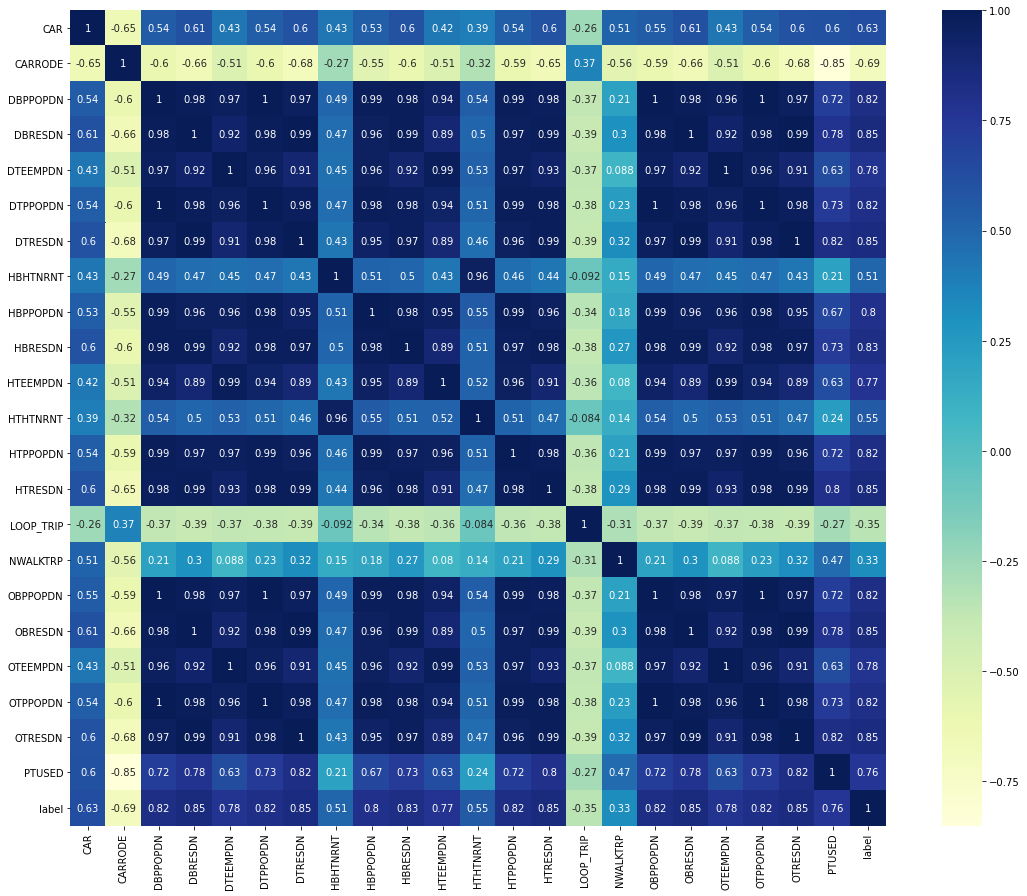

In [123]:
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr, square=True, annot=True, cmap='YlGnBu')

# Trip Level Analysis

### 5-1. Data Preparation for NY

In [148]:
df_merge_ny = df_merge[df_merge['HHSTATE'] == 'NY'].copy()
df_merge_ny = df_merge_ny.drop(['HHSTATE'], axis=1) # remove the state column

In [134]:
df_merge_ny

DBHTNRNT DBHUR  DBPPOPDN  DBRESDN  DTEEMPDN  DTHTNRNT  DTPPOPDN  \
8              5     S       750      300       350        30       750   
9             60     C     17000     7000      5000        80     17000   
10            90     C      3000     1500      5000        70     17000   
11            60     C     17000     7000      5000        80     17000   
12            20     S      3000     1500       750        20      1500   
...          ...   ...       ...      ...       ...       ...       ...   
923367        70     C      7000     7000      5000        50      7000   
923368        30     S       300      300       750        20      1500   
923369         5     R        50       50        25         5        50   
923530        -9    -9        -9       -9        -9        -9        -9   
923531        -9    -9        -9       -9        -9        -9        -9   

        DTRESDN  EDUC  GASPRICE  ...  W_CRUTCH  W_DOG  W_MTRCHR  W_NONE  \
8           300     5     233.8  ...        -1     -1        -1      -1   
9         17000     5     233.8  ...        -1     -1        -1      -1   
10         7000     5     233.8  ...        -1     -1        -1      -1   
11        17000     5     233.8  ...        -1     -1        -1      -1   
12          750     5     233.8  ...        -1     -1        -1      -1   
...         ...   ...       ...  ...       ...    ...       ...     ...   
923367     3000     2     253.8  ...        -1     -1        -1      -1   
923368      300     2     253.8  ...        -1     -1        -1      -1   
923369       50     2     253.8  ...        -1     -1        -1      -1   
923530       -9     2     255.8  ...        -1     -1        -1      -1   
923531       -9     2     255.8  ...        -1     -1        -1      -1   

        W_SCOOTR  W_WHCANE  W_WLKR  YEARMILE  YRTOUS  TARGET  
8             -1        -1      -1     17000      -1       0  
9             -1        -1      -1     17000      -1       0  
10            -1        -1      -1     17000      -1       0  
11            -1        -1      -1     17000      -1       0  
12            -1        -1      -1     17000      -1       0  
...          ...       ...     ...       ...     ...     ...  
923367        -1        -1      -1     13000      -1       0  
923368        -1        -1      -1     13000      -1       0  
923369        -1        -1      -1     13000      -1       0  
923530        -1        -1       2       -88      -1       0  
923531        -1        -1       2       -88      -1       0  

[120207 rows x 146 columns]

In [135]:
col_cat = []
for col in df_merge_ny.columns:
    try:
        _ = df_merge_ny[col].astype(float)
    except ValueError:
        print('Couldn\'t covert %s to float' % col)
        col_cat.append(col)
        pass

Couldn't covert DBHUR to float
Couldn't covert OBHUR to float
Couldn't covert TRIPPURP to float
Couldn't covert HBHUR to float


In [139]:
for i in col_cat:
    print(i)
    print(df_merge_ny[i].value_counts())
    print('')

DBHUR
T     32492
S     29943
R     27084
C     17168
U     12810
-9      710
Name: DBHUR, dtype: int64

OBHUR
T     32570
S     29962
R     27024
C     17122
U     12817
-9      712
Name: OBHUR, dtype: int64

TRIPPURP
NHB         40266
HBSHOP      25980
HBO         23475
HBSOCREC    15752
HBW         14732
-9              2
Name: TRIPPURP, dtype: int64

HBHUR
R     36066
T     31287
S     24658
C     16059
U     11448
-9      689
Name: HBHUR, dtype: int64



In [144]:
df_merge_ny = pd.get_dummies(df_merge_ny)

In [145]:
# standardization
df_ny_norm = pd.DataFrame(sc.fit_transform(df_merge_ny), columns=df_merge_ny.columns, index=list(df_merge_ny.index))
df_ny_norm.head()

DBHTNRNT  DBPPOPDN   DBRESDN  DTEEMPDN  DTHTNRNT  DTPPOPDN   DTRESDN  \
8  -1.051411 -0.507479 -0.402008 -0.596402 -0.047783 -0.474907 -0.379791   
9   1.169113  1.682617  0.730572  2.290220  2.195274  1.744252  2.412489   
10  2.380308 -0.204235 -0.199158  2.290220  1.746662  1.744252  0.740465   
11  1.169113  1.682617  0.730572  2.290220  2.195274  1.744252  2.412489   
12 -0.445814 -0.204235 -0.199158 -0.348091 -0.496394 -0.372484 -0.304550   

        EDUC  GASPRICE  HHFAMINC  ...  TRIPPURP_HBSHOP  TRIPPURP_HBSOCREC  \
8   1.117524 -1.180883  1.109575  ...        -0.525088           2.575116   
9   1.117524 -1.180883  1.109575  ...        -0.525088           2.575116   
10  1.117524 -1.180883  1.109575  ...        -0.525088           2.575116   
11  1.117524 -1.180883  1.109575  ...        -0.525088           2.575116   
12  1.117524 -1.180883  1.109575  ...        -0.525088          -0.388332   

    TRIPPURP_HBW  TRIPPURP_NHB  HBHUR_-9   HBHUR_C   HBHUR_R   HBHUR_S  \
8      -0.373728     -0.709716 -0.075926  2.546632 -0.654704 -0.508003   
9      -0.373728     -0.709716 -0.075926  2.546632 -0.654704 -0.508003   
10     -0.373728     -0.709716 -0.075926  2.546632 -0.654704 -0.508003   
11     -0.373728     -0.709716 -0.075926  2.546632 -0.654704 -0.508003   
12      2.675740     -0.709716 -0.075926  2.546632 -0.654704 -0.508003   

     HBHUR_T   HBHUR_U  
8  -0.593174 -0.324438  
9  -0.593174 -0.324438  
10 -0.593174 -0.324438  
11 -0.593174 -0.324438  
12 -0.593174 -0.324438  

[5 rows x 166 columns]

In [149]:
# drop target for clustering
df_ny_norm = df_ny_norm.drop(['TARGET'], axis=1)

### 5-2. KMeans (2 clusters)

In [153]:
# clustering with k=2
KM = KMeans(n_clusters=2, random_state=324)
cluster_km = KM.fit_predict(df_ny_norm)
cluster_km
silhouette_avg = silhouette_score(df_ny_norm, cluster_km)
print("For n_clusters ={},".format(2)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.2625131563357104


In [159]:
df_ny_cluster = df_ny_norm.copy()

In [162]:
df_ny_cluster['label'] = cluster_km
df_ny_cluster['TARGET'] = df_merge_ny['TARGET']

In [163]:
df_ny_cluster

DBHTNRNT  DBPPOPDN   DBRESDN  DTEEMPDN  DTHTNRNT  DTPPOPDN   DTRESDN  \
8      -1.051411 -0.507479 -0.402008 -0.596402 -0.047783 -0.474907 -0.379791   
9       1.169113  1.682617  0.730572  2.290220  2.195274  1.744252  2.412489   
10      2.380308 -0.204235 -0.199158  2.290220  1.746662  1.744252  0.740465   
11      1.169113  1.682617  0.730572  2.290220  2.195274  1.744252  2.412489   
12     -0.445814 -0.204235 -0.199158 -0.348091 -0.496394 -0.372484 -0.304550   
...          ...       ...       ...       ...       ...       ...       ...   
923367  1.572845  0.334866  0.730572  2.290220  0.849440  0.378616  0.071655   
923368 -0.042082 -0.568128 -0.402008 -0.348091 -0.496394 -0.372484 -0.379791   
923369 -1.051411 -0.601821 -0.444268 -0.798156 -1.169311 -0.570501 -0.421592   
923530 -1.616636 -0.609773 -0.454242 -0.819262 -1.797367 -0.578559 -0.431457   
923531 -1.616636 -0.609773 -0.454242 -0.819262 -1.797367 -0.578559 -0.431457   

            EDUC  GASPRICE  HHFAMINC  ...  TRIPPURP_HBW  TRIPPURP_NHB  \
8       1.117524 -1.180883  1.109575  ...     -0.373728     -0.709716   
9       1.117524 -1.180883  1.109575  ...     -0.373728     -0.709716   
10      1.117524 -1.180883  1.109575  ...     -0.373728     -0.709716   
11      1.117524 -1.180883  1.109575  ...     -0.373728     -0.709716   
12      1.117524 -1.180883  1.109575  ...      2.675740     -0.709716   
...          ...       ...       ...  ...           ...           ...   
923367 -0.736572  0.846908  0.524325  ...     -0.373728     -0.709716   
923368 -0.736572  0.846908  0.524325  ...     -0.373728      1.409015   
923369 -0.736572  0.846908  0.524325  ...     -0.373728     -0.709716   
923530 -0.736572  1.049688 -1.231423  ...     -0.373728     -0.709716   
923531 -0.736572  1.049688 -1.231423  ...     -0.373728     -0.709716   

         HBHUR_-9   HBHUR_C   HBHUR_R   HBHUR_S   HBHUR_T   HBHUR_U  label  \
8       -0.075926  2.546632 -0.654704 -0.508003 -0.593174 -0.324438      1   
9       -0.075926  2.546632 -0.654704 -0.508003 -0.593174 -0.324438      1   
10      -0.075926  2.546632 -0.654704 -0.508003 -0.593174 -0.324438      0   
11      -0.075926  2.546632 -0.654704 -0.508003 -0.593174 -0.324438      0   
12      -0.075926  2.546632 -0.654704 -0.508003 -0.593174 -0.324438      1   
...           ...       ...       ...       ...       ...       ...    ...   
923367  -0.075926 -0.392675  1.527407 -0.508003 -0.593174 -0.324438      1   
923368  -0.075926 -0.392675  1.527407 -0.508003 -0.593174 -0.324438      1   
923369  -0.075926 -0.392675  1.527407 -0.508003 -0.593174 -0.324438      1   
923530  13.170645 -0.392675 -0.654704 -0.508003 -0.593174 -0.324438      1   
923531  13.170645 -0.392675 -0.654704 -0.508003 -0.593174 -0.324438      1   

        TARGET  
8            0  
9            0  
10           0  
11           0  
12           0  
...        ...  
923367       0  
923368       0  
923369       0  
923530       0  
923531       0  

[120207 rows x 167 columns]

In [170]:
df_ny_cluster['label'].value_counts()

1    108871
0     11336
Name: label, dtype: int64

In [171]:
df_ny_cluster['TARGET'].value_counts()

0    102103
1     18104
Name: TARGET, dtype: int64

Flip the cluster number.

In [175]:
f = lambda x: 1 if x == 0 else 0
df_ny_cluster['label'] = df_ny_cluster['label'].apply(lambda x: 1 if x == 0 else 0)

In [183]:
pd.DataFrame(confusion_matrix(df_ny_cluster['TARGET'], df_ny_cluster['label']))

0     1
0  97547  4556
1  11324  6780

In [184]:
accuracy_score(df_ny_cluster['TARGET'], df_ny_cluster['label'])

0.8678945485703827

In [185]:
precision_score(df_ny_cluster['TARGET'], df_ny_cluster['label'])

0.5980945659844742

In [186]:
recall_score(df_ny_cluster['TARGET'], df_ny_cluster['label'])

0.37450287229341583

In [187]:
f1_score(df_ny_cluster['TARGET'], df_ny_cluster['label'])

0.4605978260869565

### 5-3. Feature Differences

In [202]:
df_ny_tp = df_ny_cluster[(df_ny_cluster['label']==1) & (df_ny_cluster['TARGET']==1)]
df_ny_tn = df_ny_cluster[(df_ny_cluster['label']==0) & (df_ny_cluster['TARGET']==0)]
df_ny_fp = df_ny_cluster[(df_ny_cluster['label']==1) & (df_ny_cluster['TARGET']==0)]
df_ny_fn = df_ny_cluster[(df_ny_cluster['label']==0) & (df_ny_cluster['TARGET']==1)]

In [203]:
df_comp = pd.DataFrame({'tp_mean': df_ny_tp.describe().loc['mean'],
                        'tn_mean': df_ny_tn.describe().loc['mean'],
                        'fp_mean': df_ny_fp.describe().loc['mean'],
                        'fn_mean': df_ny_fn.describe().loc['mean'],
                        'tp_std': df_ny_tp.describe().loc['std'],
                        'tn_std': df_ny_tn.describe().loc['std'],
                        'fp_std': df_ny_fp.describe().loc['std'],
                        'fn_std': df_ny_fn.describe().loc['std'],
                       })

In [206]:
df_comp['true_mean_diff'] = df_comp['tp_mean'] - df_comp['tn_mean']

<AxesSubplot:>

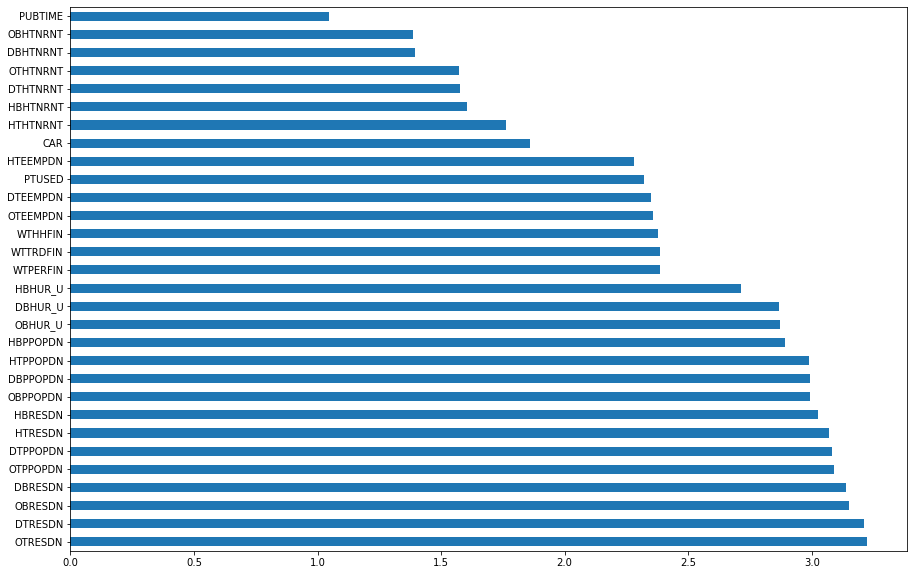

In [216]:
df_comp.sort_values(by='true_mean_diff', ascending=False).iloc[:30]['true_mean_diff'].plot.barh(figsize=(15, 10))

<AxesSubplot:>

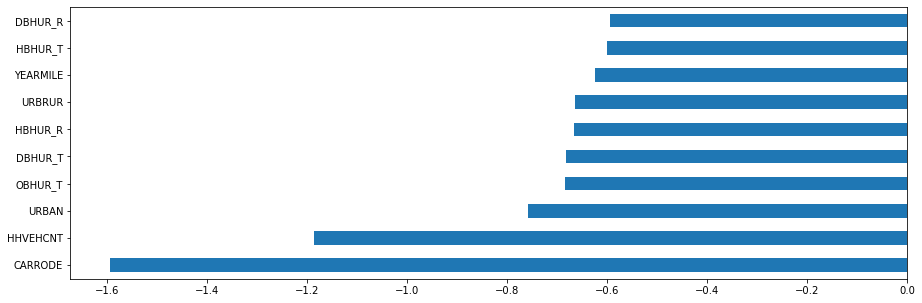

In [220]:
df_comp.sort_values(by='true_mean_diff', ascending=True).iloc[:10]['true_mean_diff'].plot.barh(figsize=(15,5))